In [11]:
#Read into a dataframe a CSV dataset
#Timestamp micro since 1970 01 01 00:00:00 GMT'
#Line ID
#Direction
#Journey Pattern ID
#Time Frame (The start date of the production time table - in Dublin the production time table starts at 6am and ends at 3am)
#Vehicle Journey ID (A given run on the journey pattern)
#Operator (Bus operator, not the driver)
#Congestion [0=no,1=yes]
#Lon WGS84'Lat WGS84'
#Delay (seconds, negative if bus is ahead of schedule)
#Block ID (a section ID of the journey pattern)
#Vehicle ID
#Stop ID
#At Stop [0=no,1=yes]

# the ultimate target feature: delay per stop

# Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

# Read csv file into a dataframe.
df = pd.read_csv('route4.csv')
df.head()

/Users/user/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Timestamp,LineID,Direction,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
0,8,1356998427000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
1,20,1356998427000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
2,44,1356998485000000,4.0,0,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0
3,46,1356998485000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1
4,67,1356998546000000,4.0,0,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1


In [12]:
df.shape

(689030, 16)

In [46]:
#update the timestamp:

df["Time"] = pd.to_datetime(df['Timestamp']*1000, unit="ns")
df.head(5)


,Unnamed: 0,Timestamp,Journey_Pattern_ID,Timeframe,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Time
0,8,1356998427000000,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:00:27
1,20,1356998427000000,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:00:27
2,44,1356998485000000,null,2012-12-31,4243,HN,0,-6.279000,53.416683,0,4001,43043,7226,0,2013-01-01 00:01:25
3,46,1356998485000000,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:01:25
4,67,1356998546000000,00041002,2012-12-31,4599,HN,0,-6.277317,53.415817,0,4012,43035,281,1,2013-01-01 00:02:26


# Dropping duplicates

In [14]:
df=df.drop_duplicates(keep='first')
df.shape

(681530, 17)

In [15]:
#df.T.drop_duplicates().T
#there are no duplicate columns and this exercise is crashing the kernal due to the size of the dataframe


In [16]:
#as we are seeing 'mixed types' warning for column 14 checking the data types:
df.dtypes

Unnamed: 0                     int64
Timestamp                      int64
LineID                       float64
Direction                      int64
Journey_Pattern_ID            object
Timeframe                     object
Vehicle_Journey_ID             int64
Operator                      object
Congestion                     int64
Lon                          float64
Lat                          float64
Delay                          int64
Block_ID                       int64
Vehicle_ID                     int64
Stop_ID                       object
At_Stop                        int64
Time                  datetime64[ns]
dtype: object

In [17]:
df.describe()


,Unnamed: 0,Timestamp,LineID,Direction,Vehicle_Journey_ID,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,At_Stop
count,6.815300e+05,6.815300e+05,681530.0,681530.0,681530.000000,681530.000000,681530.000000,681530.000000,681530.000000,681530.000000,681530.000000,681530.000000
mean,8.055587e+05,1.358318e+15,4.0,0.0,18419.449694,0.004907,-6.234028,53.347626,-116.597129,12353.638370,41911.664822,0.231095
std,4.709227e+05,7.341666e+11,0.0,0.0,108430.909990,0.069875,0.042438,0.041926,410.184561,82127.537945,2827.356145,0.421533
min,1.000000e+00,1.356998e+15,4.0,0.0,4229.000000,0.000000,-6.312333,53.278816,-2551.000000,4001.000000,33069.000000,0.000000
25%,4.127305e+05,1.357718e+15,4.0,0.0,4574.000000,0.000000,-6.265824,53.312439,-313.000000,4003.000000,43033.000000,0.000000
50%,7.618050e+05,1.358327e+15,4.0,0.0,4903.000000,0.000000,-6.257762,53.345348,-46.000000,4006.000000,43037.000000,0.000000
75%,1.196948e+06,1.358948e+15,4.0,0.0,4943.000000,0.000000,-6.201565,53.380424,53.000000,4009.000000,43042.000000,0.000000
max,1.733592e+06,1.359633e+15,4.0,0.0,999254.000000,1.000000,-6.134333,53.418999,5550.000000,822025.000000,43054.000000,1.000000


# Checking for constant columns - cardinality = 1

In [18]:
for column in df.columns:
    print(column + "," + str(len(df[column].unique())))

Unnamed: 0,563375
Timestamp,387316
LineID,1
Direction,1
Journey_Pattern_ID,7
Timeframe,32
Vehicle_Journey_ID,596
Operator,4
Congestion,2
Lon,34662
Lat,28283
Delay,3876
Block_ID,42
Vehicle_ID,116
Stop_ID,242
At_Stop,2
Time,387316


In [19]:
df.Operator.unique()

array(['HN', 'D1', 'SL', 'D2'], dtype=object)

# Notes on missing values

In [20]:
df.isnull().sum()

Unnamed: 0             0
Timestamp              0
LineID                 0
Direction              0
Journey_Pattern_ID    15
Timeframe              0
Vehicle_Journey_ID     0
Operator               0
Congestion             0
Lon                    0
Lat                    0
Delay                  0
Block_ID               0
Vehicle_ID             0
Stop_ID                0
At_Stop                0
Time                   0
dtype: int64

It does not appear that any feature has so many missing values that the feature should be dropped right now. So there is no missing value work at the outset. 

# Looking at the data to check what some features represent by checking their unique values

In [47]:
df.Timeframe.unique()

array(['2012-12-31', '2013-01-01', '2013-01-02', '2013-01-03',
       '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
       '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
       '2013-01-12', '2013-01-13', '2013-01-14', '2013-01-15',
       '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-19',
       '2013-01-20', '2013-01-21', '2013-01-22', '2013-01-23',
       '2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27',
       '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31'], dtype=object)

In [48]:
df.Block_ID.unique()

array([  4001,   4012,   4002,   4003,   4004,   4005,   4007,   4006,
         4009,   4008,   4010, 822025,   4070,   4011,   4075,   4013,
         4014,   4015,   4016,   4017,   4018,   4019,   4020,   4099,
        40312,  40507,   4090,   4091,   4085,   4501,   4508,   4021,
         4022,   4069,   4068,   4023,   4071,   4072,   4076,   4312,
         4507,   4024])

In [49]:
df.Journey_Pattern_ID.unique()

array(['null', '00041002', '00040001', '00041001', '00040002', '033X1001',
       'nan'], dtype=object)

So journey pattern ID relates to Block ID

In [50]:
df.Stop_ID.unique()

array(['7226', '281', 'null', '324', '7480', '327', '7482', '7113', '127',
       '112', '113', '114', '115', '37', '38', '39', '146', '147', '184',
       '185', '186', '187', '188', '189', '190', '191', '819', '7457',
       '4725', '273', '402', '405', '408', '409', '410', '411', '412',
       '413', '414', '415', '416', '417', '418', '419', '420', '421',
       '423', '424', '425', '426', '427', '428', '429', '6334', '3115',
       '3116', '6085', '2026', '7330', '2051', '6086', '3162', '3163',
       '3164', '3084', '469', '470', '471', '472', '473', '475', '476',
       '477', '478', '479', '481', '482', '483', '485', '487', '488',
       '489', '490', '491', '492', '493', '494', '495', '400', '6', '194',
       '40', '195', '196', '197', '198', '199', '200', '201', '148', '149',
       '150', '27', '29', '4680', '90', '91', '92', '93', '94', '126',
       '6182', '322', '323', '332', '3161', '4705', '480', '28', '422',
       '3114', '748', 324, 2026, 429, 39, 478, 411, 199, 189

In [51]:
df.select_dtypes(['object']).describe().T

,count,unique,top,freq
Journey_Pattern_ID,681530,7,00040001,308104
Timeframe,681530,32,2013-01-16,29885
Stop_ID,681530,242,7330,34054


Issue is equating the number of journey patters to either daily schedules (weekday, sat, sun, BH perhaps?), directional schedules or variations of the bus route (4A for example). 

In [42]:
df['Block_ID'].groupby(df['Journey_Pattern_ID']).count().T

Journey_Pattern_ID
00040001    308104
00040002      2919
00041001    307252
00041002      2613
033X1001         9
nan             15
null         60618
Name: Block_ID, dtype: int64


To find out: Why are there 242 unique stop IDs when the number 4 does not have 242 stops?

Why are we seeing 'nan' here when we have converted to string - what is this and what does this feature really represent:

Is it days of the week schedules (sat/BH/sun/weekday etc)? 
Is it variants on the routes?

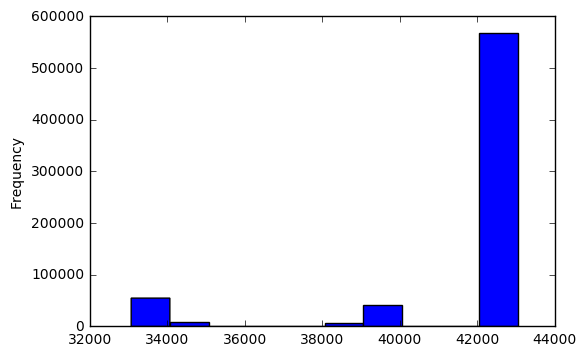

In [35]:
df['Vehicle_ID'].plot(kind='hist')

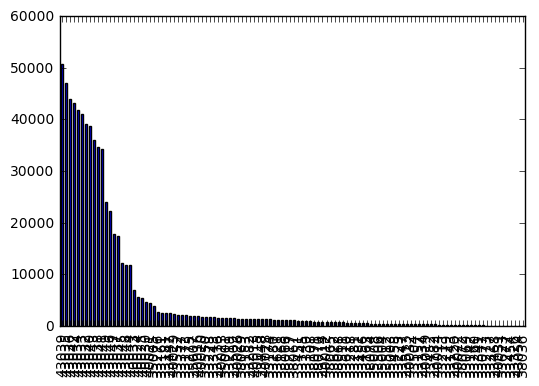

In [36]:
df['Vehicle_ID'].value_counts().plot(kind='bar')

Perhaps these do represent direction given there are no variants on the route (A/B etc) decommissioned 4A in 2010 according to this http://www.boards.ie/vbulletin/showthread.php?t=2056040487

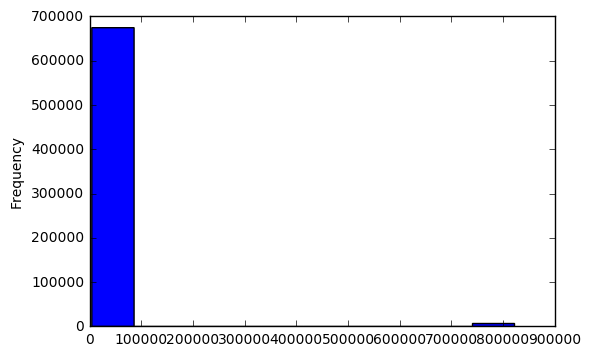

In [52]:
df['Block_ID'].plot(kind='hist')

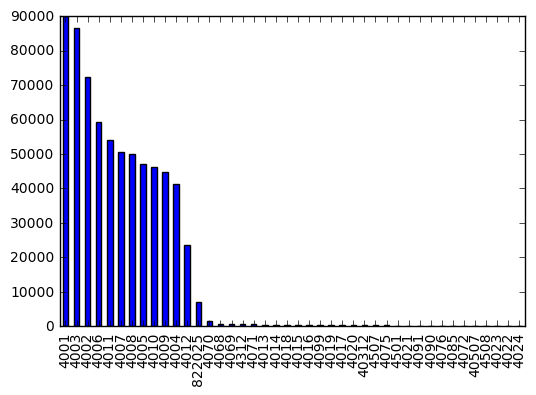

In [53]:
df['Block_ID'].value_counts().plot(kind='bar')

# Dropping constant columns

Direction is a constant - that is unexpected
Line is constant as we filtered for line

In [44]:
df = df.drop('LineID', 1)
df = df.drop('Direction', 1)
df.shape

(681530, 15)

# Group continuous and categorical data 

In [39]:
#grouping continuous and categorical data fields

df['Congestion'] = df['Congestion'].astype('category')
df['Operator'] = df['Operator'].astype('category')

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
